<a href="https://colab.research.google.com/github/nebojsa-bozanic/BMI_OSuM/blob/master/Vezba5%3A%20Obrada%20rendgenske%20slike%3A%20Logaritamska%20kompresija%20opsega/OSuM_vezba_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82

Laboratorijska vežba 5: Obrada rendgenske slike: Logaritamska kompresija opsega

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot

In [1]:
!git clone https://github.com/nebojsa-bozanic/BMI_OSuM.git
%cd /content/BMI_OSuM/Vezba5: Obrada rendgenske slike: Logaritamska kompresija opsega

Cloning into 'BMI_OSuM'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 820 (delta 99), reused 125 (delta 57), pack-reused 606
Receiving objects: 100% (820/820), 273.27 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (286/286), done.
Updating files: 100% (245/245), done.
/content/BMI_OSuM/Vezba5: Obrada rendgenske slike: Logaritamska kompresija opsega


In [2]:
import cv2
import osum
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

# 1. Sirova slika

1.1 Učitati sirovu sliku Ro_01.fxd koristeći funkciju read_raw iz modula osum.py.

In [3]:
[im, DetInfo, hdr] = osum.read_raw('Ro_01.fxd')

1.2 U kom opsegu se nalaze vrednosti slike? Koji je tip slike? Koje su dimenzije slike?

1.3 Prikazati sliku. Koji modalitet je u pitanju i šta se vidi na slici?

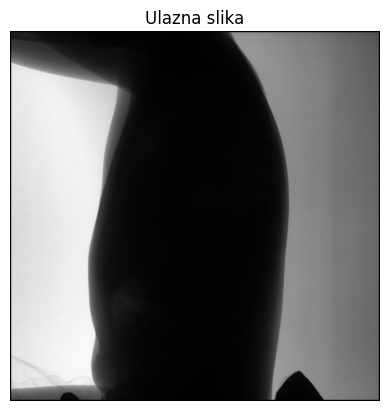

In [4]:
plt.imshow(im/im.max(), cmap='gray')
plt.axis('off')
plt.title('Ulazna slika')
plt.show()

1.4 Napraviti histogram slike u granicama od 0 do 16384 sa korakom 8.

In [5]:
g = np.arange(0, 16385, 8)
h1 = np.histogram(im, g)

1.5 Prikazati histogram. Kako izgleda raspodela i kako se to odražava na izgled snimka?

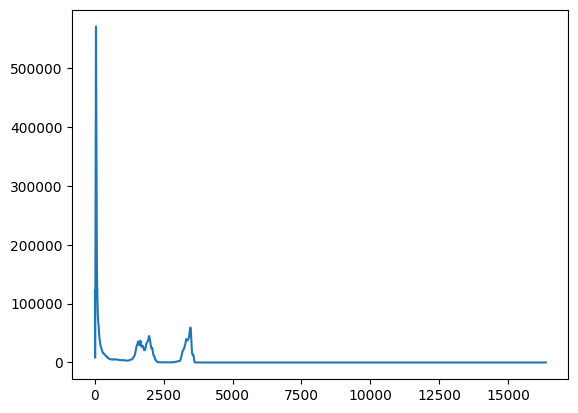

In [6]:
plt.figure()
plt.plot(g[:-1], h1[0])
plt.show()


# 2. Logaritamska kompresija opsega

2.1 U modulu osum.py napraviti funkciju log_LUT u kojoj se pravi look-up tabela sa logaritamskom kompresijom opsega. Ulazni parametri funkcije su ulazni opseg, izlazni opseg i tolerancija do koje se komprimuje linearno.

5
17
2.8903717578961645
9.704060527839234
[0.00000000e+00 2.50000000e-01 5.00000000e-01 ... 4.09589005e+03
 4.09592670e+03 4.09600000e+03]


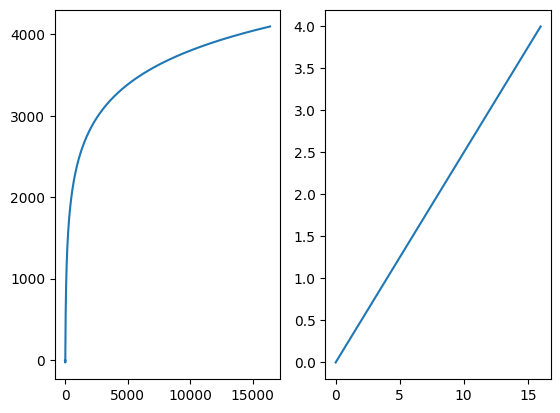

In [7]:
ip_opseg = 16384
op_opseg = 4096
tol = 0.001
# ip_opseg - gornja granica ulaznog opsega
# op_opseg - gornja granica izlaznog opsega
# tol - procenat (0-1) ulaznog opsega na pocetku koji ce biti transformisan
# linearno kako se ne bi pojacao sum

# gornja granica lin dela izlaznog opsega
lin_op_opseg = int(np.ceil(tol*op_opseg))
print(lin_op_opseg)
# gornja granica lin dela izlaznog opsega
lin_ip_opseg = int(np.ceil(tol*ip_opseg))
print(lin_ip_opseg)
# pocetak log dela izlaznog opsega
log_min = np.log(lin_ip_opseg+1)
print(log_min)
# kraj log dela izlaznog opsega
log_max = np.log(ip_opseg)
print(log_max)

# inicijalizacija LUT
lut = np.zeros(ip_opseg)

# korak za linearni deo izlaznog opsega
step = (lin_op_opseg-1)/(lin_ip_opseg-1)
# linearni deo LUT
lut[0:lin_ip_opseg] = np.arange(0, lin_op_opseg-1+step, step)

k = (op_opseg-lin_op_opseg)/(log_max-log_min)

# log deo krece od lin_op_opseg
# k - za skaliranje ulaznog u izlazni opseg
# log deo se proteze od lin_ip_opseg do ip_opseg-1
# log_min se oduzima na kraju da se grafik spusti na 0,
# a zatim se podize na vrednost lin_op_opseg (moze se posmatrati kao korekcija
# minimuma prilikom normalizacije)
log_deo = lin_op_opseg+k*(np.log(np.arange(lin_ip_opseg, ip_opseg))-log_min)
lut[lin_ip_opseg:ip_opseg+1] = log_deo

lut[-1] = op_opseg

print(lut)

fig, axs = plt.subplots(1, 2)
axs[0].plot(lut)
axs[1].plot(lut[0:lin_ip_opseg])


2.2 Napraviti LUT za logaritamsku kompresiju opsega tako da se ulazni opseg od 16384 pretvori u opseg 4096 sa tolerancijom 0.001. Primeniti LUT na ulaznu sliku.

In [8]:
lut = osum.log_LUT(16384, 4096, 0.001)
# lut = osum.log_LUT(16384, 4096, 0.1) # 2.5
im_log = lut[im]

2.3 Prikazati sliku nakon logaritamske kompresije opsega. Koji je efekat ove
transformacije?

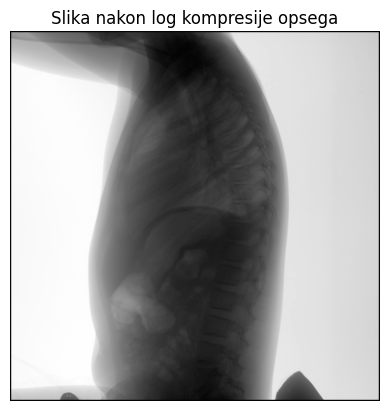

In [9]:
plt.imshow(im_log/im_log.max(), cmap='gray')
plt.axis('off')
plt.title('Slika nakon log kompresije opsega')
plt.show()

2.4 Napraviti histogram slike nakon primenjene transformacije i na istom grafiku prikazati histogram pre i nakon transformacije. Kako se razlikuju raspodele?

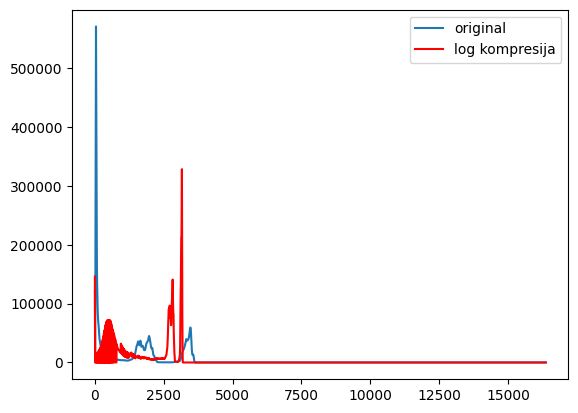

In [10]:
h2 = np.histogram(im_log, g)

plt.figure()
plt.plot(g[:-1], h1[0])
plt.plot(g[:-1], h2[0], 'r')
plt.legend(['original', 'log kompresija'])
plt.show()

2.5 Ponoviti korak 2.2 koristeći toleranciju od 0.1. Prikazati sliku. Zašto se vidi manje struktura?

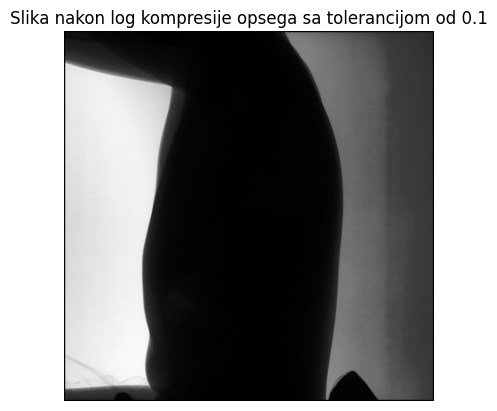

In [11]:
lut = osum.log_LUT(16384, 4096, 0.1) # 2.5
im_log = lut[im]

plt.imshow(im_log/im_log.max(), cmap='gray')
plt.axis('off')
plt.title('Slika nakon log kompresije opsega sa tolerancijom od 0.1')
plt.show()
h2 = np.histogram(im_log, g)

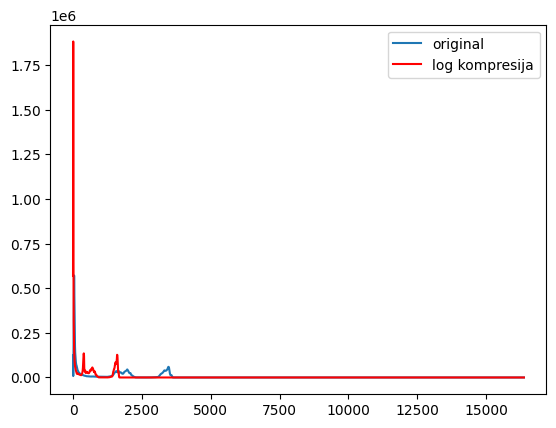

In [12]:
plt.figure()
plt.plot(g[:-1], h1[0])
plt.plot(g[:-1], h2[0], 'r')
plt.legend(['original', 'log kompresija'])
plt.show()